In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel("Churn_Modelling.xlsx")
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [38]:
input_data = df.iloc[:,:-1]
output_data =df.iloc[:,-1]

In [39]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [40]:
input_data.shape

(10000, 8)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [42]:
x_train.shape

(8000, 8)

In [43]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout#BatchNormalization & Dropout  
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [45]:
ann = Sequential()

In [46]:
ann.add(Dense(6, input_dim=8, activation="relu",kernel_regularizer=L2(l2=0.01))) # First hidden layer
#ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(4, activation="relu",kernel_regularizer=L2(l2=0.01)))              # Second hidden layer
#ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(2, activation="relu",kernel_regularizer=L2(l2=0.01)))              # Third hidden layer
#ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(1, activation="sigmoid"))           # Output layer

In [47]:
ann.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
ann.fit(x_train, y_train, validation_split=0.2, batch_size=100, epochs=50,validation_data=(x_test,y_test),callbacks = EarlyStopping())

Epoch 1/50
80/80 [==============================] - 2s 9ms/step - loss: 0.8115 - accuracy: 0.7577 - val_loss: 0.7649 - val_accuracy: 0.8020
Epoch 2/50
80/80 [==============================] - 0s 5ms/step - loss: 0.7317 - accuracy: 0.7825 - val_loss: 0.6869 - val_accuracy: 0.8035


In [49]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"]

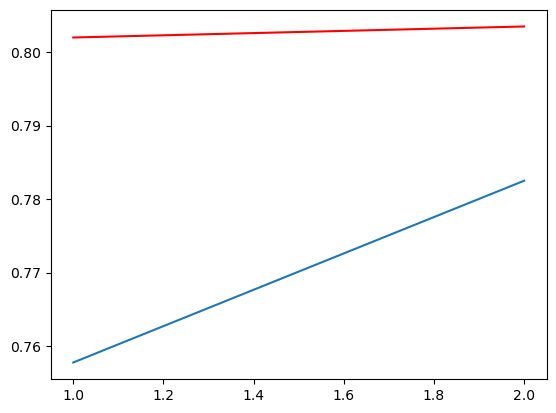

In [50]:
plt.plot([i for i in range(1,3)],train_accuracy)
plt.plot([i for i in range(1,3)],test_accuracy, c="red")
plt.show()

In [51]:
prd1 = ann.predict(x_train)
prd_data1 = [] 
for i in prd1:
    if i[0] > 0.5 :
        prd_data1.append(1)
    else :
        prd_data1.append(0)

250/250 [==============================] - 1s 4ms/step


In [52]:
prd = ann.predict(x_test)

63/63 [==============================] - 1s 8ms/step


In [53]:
prd_data = [] 
for i in prd:
    if i[0] > 0.5 :
        prd_data.append(1)
    else :
        prd_data.append(0)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,prd_data)*100

80.35

In [56]:
accuracy_score(y_train,prd_data1)*100

79.45

In [57]:
prd = ann.predict([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]])
prd_data = [] 
for i in prd:
    if i[0] > 0.5 :
        prd_data.append(1)
    else :
        prd_data.append(0)
prd_data

1/1 [==============================] - 0s 131ms/step


[0]

In [58]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64